In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# The library used to spliting training set and test set
from sklearn.model_selection import train_test_split

from scipy.interpolate import splrep, splev
#from scipy.stats import norm


1.1 Linear Regression

In [3]:
# Data
X = np.array([1, 2, 3, 4]).reshape(-1, 1)
Y = np.array([3, 2, 0, 5])
X_b = np.c_[np.ones((4, 1)), X]

In [4]:
#Define Mean Square Error Function

def m_s_e(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

In [5]:
# Data of Regression Degree 0
X_b_0 = np.c_[np.ones((4, 1))]

# Calculate Beta
beta_hat_0 = np.linalg.inv(X_b_0.T.dot(X_b_0)).dot(X_b_0.T).dot(Y)

# Prediction
y_pred_0 = X_b_0.dot(beta_hat_0)

# Smoothing points
tck0 = splrep(X, y_pred_0)
xnew0 = np.linspace(X.min()-1, X.max()+1, 400)
ynew0 = splev(xnew0, tck0)


print(f"Regression equation: y = {beta_hat_0[0]:.2f} ", end="")
print()

mse0 = m_s_e(Y,y_pred_0)
print(f"Mean Squared Error: {mse0}")

Regression equation: y = 2.50 
Mean Squared Error: 3.25


In [6]:
# Data of Regression Degree 1
X = np.array([1, 2, 3, 4]).reshape(-1, 1)
Y = np.array([3, 2, 0, 5])
X_b_1 = np.c_[np.ones((4, 1)), X]

# Calculate Beta
beta_hat_1 = np.linalg.inv(X_b_1.T.dot(X_b_1)).dot(X_b_1.T).dot(Y)

# Prediction
y_pred_1 = X_b_1.dot(beta_hat_1)

# Smoothing points
tck1 = splrep(X, y_pred_1)
xnew1 = np.linspace(X.min()-1, X.max()+1, 400)
ynew1 = splev(xnew1, tck1)


print(f"Regression equation: y = {beta_hat_1[0]:.2f} ", end="")
print(f"+ {beta_hat_1[1]:.2f}*x^{1} ",end="")
#for power, coef in enumerate(beta_hat_1, 1):
    #print(f"+ {coef:.2f}*x^{power} ", end="")
print()

mse1 = m_s_e(Y,y_pred_1)
print(f"Mean Squared Error: {mse1}")

Regression equation: y = 1.50 + 0.40*x^1 
Mean Squared Error: 3.05


In [7]:
# Data of Regression Degree 2
X = np.array([1, 2, 3, 4]).reshape(-1, 1)
Y = np.array([3, 2, 0, 5])

X_poly_2 = np.c_[X, X**2]
#X_poly_b = np.c_[np.ones((4, 1)), X_poly_2]
X_b_2 = np.c_[np.ones((4, 1)), X_poly_2]

# Calculate Beta
beta_hat_2 = np.linalg.inv(X_b_2.T.dot(X_b_2)).dot(X_b_2.T).dot(Y)

# Prediction
y_pred_2 = X_b_2.dot(beta_hat_2)

# Smoothing points
tck2 = splrep(X, y_pred_2)
xnew2 = np.linspace(X.min()-1, X.max()+1, 400)
ynew2 = splev(xnew2, tck2)

print(f"Regression equation: y = {beta_hat_2[0]:.2f} ", end="")
for power, coef in enumerate(beta_hat_2[1:], 1):
    print(f"+ {coef:.2f}*x^{power} ", end="")
print()

mse2 = m_s_e(Y, y_pred_2)
print(f"Mean Squared Error: {mse2}")

Regression equation: y = 9.00 + -7.10*x^1 + 1.50*x^2 
Mean Squared Error: 0.800000000000001


In [8]:
# Data of Regression Degree 2
X = np.array([1, 2, 3, 4]).reshape(-1, 1)
Y = np.array([3, 2, 0, 5])

X_poly_3 = np.c_[X, X**2, X**3]
X_b_3 = np.c_[np.ones((4, 1)), X_poly_3]

# Calculate Beta
beta_hat_3 = np.linalg.inv(X_b_3.T.dot(X_b_3)).dot(X_b_3.T).dot(Y)

# Prediction
y_pred_3 = X_b_3.dot(beta_hat_3)

# Smoothing points
tck3 = splrep(X, y_pred_3)
xnew3 = np.linspace(X.min()-1, X.max()+1, 400)
ynew3 = splev(xnew3, tck3)

print(f"Regression equation: y = {beta_hat_3[0]:.2f} ", end="")
for power, coef in enumerate(beta_hat_3[1:], 1):
    print(f"+ {coef:.2f}*x^{power} ", end="")
print()

mse3 = m_s_e(Y, y_pred_3)
print(f"Mean Squared Error: {mse3}")

Regression equation: y = -5.00 + 15.17*x^1 + -8.50*x^2 + 1.33*x^3 
Mean Squared Error: 3.4942940895563015e-23


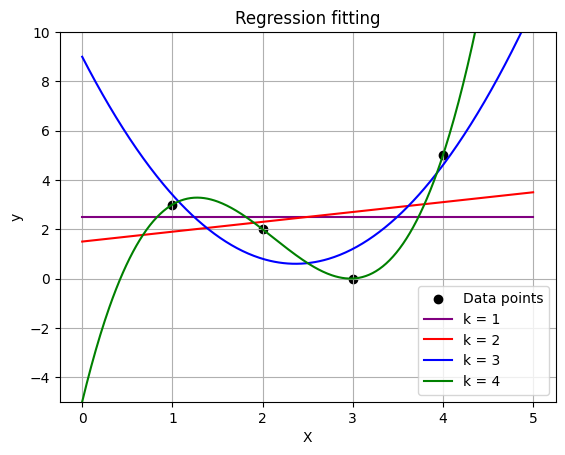

In [9]:
# Plot
plt.scatter(X, Y, color='black', label='Data points')
plt.plot(xnew0, ynew0, color='purple', label='k = 1')
plt.plot(xnew1, ynew1, color='red', label='k = 2')
plt.plot(xnew2, ynew2, color='blue', label='k = 3')
plt.plot(xnew3, ynew3, color='green', label='k = 4')
plt.legend()
plt.title('Regression fitting')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim([-5,10])
#plt.axhline(0, color='black',linewidth=2)
plt.grid(True)
plt.show()

In [10]:
# Random seeding
np.random.seed(0)

# Generate xi
xi = np.random.uniform(0, 1, 30)

# Sort the order of xi
sorted = np.argsort(xi)
xi = xi[sorted]

# Random sampling
g_xi = []
sin = []
for i in range(30):
    e = np.random.normal(0, 0.07, 1)
    g_xi.append(np.sin(2 * np.pi * xi[i])**2 + e)
    sin.append(np.sin(2 * np.pi * xi[i])**2)

g_xi = np.array(g_xi)
sin = np.array(sin)

# Smoothing points
tck4 = splrep(xi, sin)
xnew4 = np.linspace(0, 1, 100)
ynew4 = splev(xnew4, tck4)

print(xi)
print(sin)

[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
[0.0160515  0.18633072 0.27093191 0.45779226 0.61429749 0.44705979
 0.26098669 0.21298697 0.14605935 0.05744468 0.01872691 0.03260062
 0.0774432  0.0911547  0.17191835 0.36209434 0.59320316 0.62977836
 0.95291885 0.96902658 0.96365399 0.93282921 0.90759339 0.75387227
 0.53131908 0.39539073 0.20308283 0.11607271 0.05122763 0.01794023]


(-0.05, 1.05)

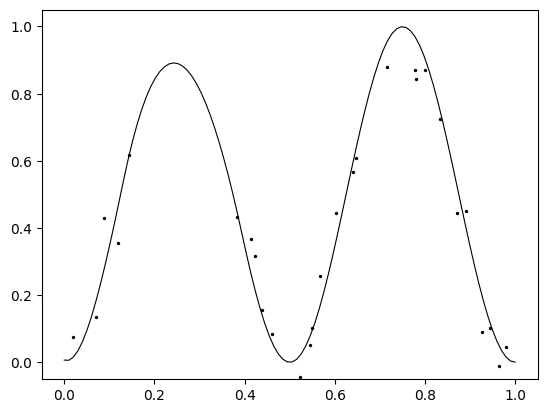

In [11]:
plt.scatter(xi, g_xi, color='black',s = 2)
plt.plot(xnew4, ynew4, color='black',linewidth = 0.8)
plt.ylim([-0.05,1.05])

1.2 Filtered Boston housing and kernels

In [12]:
data = pd.read_csv('./Boston-filtered.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [13]:
labelname = 'MEDV'
columnB = ' ZN '

In [14]:
data.columns

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [15]:
np.random.seed(123)

In [16]:
def get_traintest(data,labelname,columnB, i): # normalization + split train & test
  # drop all NA and inf
  data = data.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
  # drop the colunm B
  data = data.drop([columnB],axis=1)
  # split train/test by test size = 1/3
  train, test = train_test_split(data, test_size = 1/3, random_state=i)
  # Get train x/y and test x/y
  train_x = train.drop([labelname],axis=1)
  train_y = train[labelname]
  test_x = test.drop([labelname],axis=1)
  test_y = test[labelname]
  return train_x,train_y,test_x,test_y,train, test

In [17]:
train_x,train_y,test_x,test_y,train, test = get_traintest(data,labelname,columnB, 100)
print(train_x.shape[0])

337


In [18]:
# Create a vector of ones
train_rows = train_x.shape[0]
test_rows = test_x.shape[0]
ones_train = np.ones(train_rows).reshape(-1,1)
ones_test = np.ones(test_rows).reshape(-1,1)
ones_train[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [19]:
def evaluate_model(train_x, train_y, test_x, test_y):
    # Create a vector of ones
    train_rows = train_x.shape[0]
    test_rows = test_x.shape[0]
    ones_train = np.ones(train_rows).reshape(-1,1)
    ones_test = np.ones(test_rows).reshape(-1,1)

    # Data 
    X = train_x
    Y = train_y
    X_b = np.c_[np.ones((train_rows, 1)), X]
    X_b_test = np.c_[np.ones((test_rows,1)),test_x]

    # Calculate Beta
    beta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

    # Prediction
    y_train_pred = X_b.dot(beta_hat)
    y_test_pred = X_b_test.dot(beta_hat)

    mse_train = m_s_e(train_y, y_train_pred)
    mse_test = m_s_e(test_y, y_test_pred)

    return beta_hat, mse_train, mse_test

# 1.2 (a)

In [20]:
num_splits = 20
train_errors = []
test_errors = []
train_rows = train_x.shape[0]
test_rows = test_x.shape[0]
ones_train = np.ones(train_rows).reshape(-1,1)
ones_test = np.ones(test_rows).reshape(-1,1)

for i in range(num_splits):
    train_x, train_y, test_x, test_y,train,test = get_traintest(data, labelname, columnB, i)

    # Data 
    Y = train_y
    X_b = np.ones((train_rows, 1))
    X_b_test = np.ones((test_rows,1))

    # Calculate Beta
    beta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

    # Prediction
    y_train_pred = X_b.dot(beta_hat)
    y_test_pred = X_b_test.dot(beta_hat)

    mse_train = m_s_e(train_y, y_train_pred)
    mse_test = m_s_e(test_y, y_test_pred)

    train_errors.append(round(mse_train,4))
    test_errors.append(round(mse_test,4))

# Standard deviation of errors
train_errors_std = round(np.std(train_errors),4)
test_errors_std = round(np.std(test_errors),4)

# Mean of errors
train_errors_mean = round(np.mean(train_errors),4)
test_errors_mean = round(np.mean(test_errors),4)

print(f"Regression Function: y = {beta_hat[0]:.4f}")
print(f"Train Errors: {train_errors}")
print(f"Test Errors: {test_errors}")
print(f"Average Train Errors: {train_errors_mean}")
print(f"Average Test Errors: {test_errors_mean}")
print(f"Standard Deviation of Train Errors (σ′): {train_errors_std}")
print(f"Standard Deviation of Test Errors (σ′): {test_errors_std}")


Regression Function: y = 22.0475
Train Errors: [86.5322, 82.5757, 81.9788, 86.2058, 70.5105, 80.0482, 81.1651, 88.4819, 87.4394, 83.2848, 78.5647, 83.2504, 84.7001, 86.8136, 85.8312, 83.9418, 91.6771, 88.4853, 85.6552, 71.6729]
Test Errors: [80.4385, 88.2131, 89.2866, 80.8629, 113.1482, 93.1388, 90.9234, 76.3326, 78.4081, 87.0987, 96.6395, 86.7684, 84.0017, 80.0262, 81.9385, 85.4063, 71.0483, 76.4067, 82.0182, 110.5427]
Average Train Errors: 83.4407
Average Test Errors: 86.6324
Standard Deviation of Train Errors (σ′): 5.1225
Standard Deviation of Test Errors (σ′): 10.3287


In [21]:
bias_train_x = train_x.copy()
bias_train_x['Bias'] = ones_train
bias_test_x = test_x.copy()
bias_test_x['Bias'] = ones_test
bias_test_x.head()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Bias
38,0.17505,5.96,0,0.499,5.966,30.2,3.8473,5,279,19.2,10.13,1.0
10,0.22489,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,20.45,1.0
142,3.32105,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,1.0
235,0.33045,6.20,0,0.507,6.086,61.5,3.6519,8,307,17.4,10.88,1.0
350,0.06211,1.25,0,0.429,6.490,44.4,8.7921,1,335,19.7,5.98,1.0


In [22]:
bias_train_x_selected = bias_train_x.iloc[:,[0,11]]
train_x.columns[6]

'DIS'

1.2 (c)

In [24]:
# Store the weight and intercept vector
weight = []
intercept_vector = []

N = len(train_x.columns)
MSE_c_train = np.zeros((20,N))
MSE_c_test = np.zeros((20,N))
print(MSE_c_test.shape)

# Random seed
np.random.seed(100)

# The function of linear regression regarding a single attribute
def linear_regression_single(train_x, train_y, test_x, test_y, i):
  train_errors = []
  test_errors = []
  # Repeat 20 times
  for i in range(num_splits):
    # Get the training set and test set
    train_x, train_y, test_x, test_y,train,test = get_traintest(data, labelname, columnB, i)
    
    # Create vector of ones
    ones_train = np.ones(train_rows).reshape(-1,1)
    ones_test = np.ones(test_rows).reshape(-1,1)

    MSE_c_train = []
    MSE_c_test = []
    weight = []
    intercept_vector = []
   
    # Each attributes
    for j in range(N):
      train_x_selected = train_x.iloc[:,[j]]
      test_x_selected = test_x.iloc[:,[j]]
      beta_hat, mse_c_train, mse_c_test = evaluate_model(train_x_selected, train_y, test_x_selected, test_y)

      # Store the fitting result
      weight.append(round(beta_hat[1],4))
      intercept_vector.append(round(beta_hat[0],4))
      MSE_c_train.append(round(mse_c_train,4))
      MSE_c_test.append(round(mse_c_test,4))

    # Training and Test error of each time
    train_errors.append(MSE_c_train)
    test_errors.append(MSE_c_test)
    print(f"Weight Vector for the {i+1} trains: {weight}")
  return train_errors, test_errors

train_errors, test_errors = linear_regression_single(train_x, train_y, test_x, test_y, 10)

Average_train_MSE = []
Average_test_MSE = []
train_errors = np.array(train_errors)
test_errors = np.array(test_errors)

# Average MSE for each Regression model over 20 times
for k in range(N): 
  Average_train_MSE.append(round(sum(train_errors[:,k])/num_splits,4))
  Average_test_MSE.append(round(sum(test_errors[:,k])/num_splits,4))


print(f"Average train MSE over 20 runs = {Average_train_MSE}")
print(f"Average test MSE over 20 runs = {Average_test_MSE}")

(20, 11)
Weight Vector for the 1 trains: [-0.4266, -0.678, 6.0171, -34.4163, 9.2919, -0.128, 1.0821, -0.4248, -0.0264, -2.339, -0.9887]
Weight Vector for the 2 trains: [-0.4251, -0.6275, 6.4037, -34.8911, 9.2842, -0.1348, 1.2981, -0.3842, -0.0235, -2.1333, -0.9164]
Weight Vector for the 3 trains: [-0.3714, -0.5888, 8.8088, -30.4539, 8.3593, -0.1097, 0.8904, -0.3579, -0.0229, -2.0625, -0.945]
Weight Vector for the 4 trains: [-0.3872, -0.6605, 9.1046, -33.9179, 9.2824, -0.1248, 1.1354, -0.3777, -0.0244, -2.1022, -0.9912]
Weight Vector for the 5 trains: [-0.399, -0.643, 8.8639, -32.8169, 8.615, -0.1258, 1.1111, -0.3911, -0.025, -1.7494, -0.8774]
Weight Vector for the 6 trains: [-0.4458, -0.6863, 2.8142, -34.1108, 8.8138, -0.1242, 1.1627, -0.44, -0.0267, -2.2265, -0.9404]
Weight Vector for the 7 trains: [-0.4289, -0.6605, 7.2405, -32.0386, 8.9399, -0.1221, 1.0428, -0.3909, -0.0261, -2.1137, -0.9752]
Weight Vector for the 8 trains: [-0.5456, -0.6517, 6.9816, -35.5697, 9.7717, -0.1181, 1.141

1.2 (d)

In [25]:
weight = []
intercept_vector = []

N = len(train_x.columns)
MSE_c_train = np.zeros((20,N))
MSE_c_test = np.zeros((20,N))
print(MSE_c_test.shape)

np.random.seed(100)

# The function of linear regression regarding all attributes, similar to the function in 1.2(c)
def linear_regression_multiple(train_x, train_y, test_x, test_y, i):
  train_errors = []
  test_errors = []
  # Repeat 20 times
  for i in range(num_splits):
    train_x, train_y, test_x, test_y,train,test = get_traintest(data, labelname, columnB, i)
   
    ones_train = np.ones(train_rows).reshape(-1,1)
    ones_test = np.ones(test_rows).reshape(-1,1)
    MSE_c_train = []
    MSE_c_test = []
    intercept_vector = []
    
    # Each attributes
    train_x_selected = train_x
    test_x_selected = test_x
    beta_hat, mse_c_train, mse_c_test = evaluate_model(train_x_selected, train_y, test_x_selected, test_y)

    weight = np.around(beta_hat,4)
    intercept_vector.append(round(beta_hat[0],4))

    train_errors.append(round(mse_c_train,4))
    test_errors.append(round(mse_c_test,4))
    print(f"Weight Vector for the {i+1} trains: {list(weight)[1:]}")
  return train_errors, test_errors

train_errors, test_errors = linear_regression_multiple(train_x, train_y, test_x, test_y, 10)

Average_train_MSE = []
Average_test_MSE = []
train_errors = np.array(train_errors)
test_errors = np.array(test_errors)

#Average MSE for each Regression model over 20 times
Average_train_MSE.append(round(sum(train_errors[:])/num_splits,4))
Average_test_MSE.append(round(sum(test_errors[:])/num_splits,4))

print(f"Average train MSE over 20 runs = {Average_train_MSE[0]}")
print(f"Average test MSE over 20 runs = {Average_test_MSE[0]}")

(20, 11)
Weight Vector for the 1 trains: [-0.1098, -0.0222, 2.5898, -18.3339, 3.8738, -0.0147, -1.3129, 0.2119, -0.0081, -1.1868, -0.5242]
Weight Vector for the 2 trains: [-0.0979, 0.0314, 3.3286, -22.1178, 3.6732, -0.0012, -1.0663, 0.2467, -0.0067, -1.1429, -0.5268]
Weight Vector for the 3 trains: [-0.0848, -0.0512, 4.2976, -14.4753, 3.2898, 0.0141, -1.1081, 0.2322, -0.0082, -1.1409, -0.6352]
Weight Vector for the 4 trains: [-0.1305, -0.0824, 4.1018, -13.2788, 3.5905, 0.0106, -0.9213, 0.2097, -0.0041, -0.9514, -0.6318]
Weight Vector for the 5 trains: [-0.1164, -0.0503, 4.8642, -16.3036, 3.1196, -0.0049, -1.1882, 0.3091, -0.0124, -0.8714, -0.5326]
Weight Vector for the 6 trains: [-0.1416, -0.0639, 1.0748, -12.877, 3.9418, -0.012, -1.1328, 0.2864, -0.0118, -1.0845, -0.5064]
Weight Vector for the 7 trains: [-0.092, -0.0534, 2.8919, -15.3965, 3.5537, -0.0042, -1.2863, 0.2917, -0.0135, -1.0787, -0.5661]
Weight Vector for the 8 trains: [-0.11, -0.0016, 2.7844, -16.7623, 5.2679, -0.0137, -1.

In [26]:
num_splits = 20


for i in range(num_splits):
  train_x, train_y, test_x, test_y, train, test = get_traintest(data, labelname, columnB,i)
  bias_train_x = train_x.copy()
  bias_train_x['Bias'] = ones_train
  bias_test_x = test_x.copy()
  bias_test_x['Bias'] = ones_test
  MSE_c_train, MSE_c_test = linear_regression_single(bias_train_x, train_y, bias_test_x, test_y, i)

# print(MSE_c_train[:2])
# print(MSE_c_test[:2])


mean_train = np.mean(MSE_c_train, axis=0)
mean_test = np.mean(MSE_c_test, axis=0)
std_train = np.std(MSE_c_train, axis=0)
std_test = np.std(MSE_c_test, axis=0)

# return mean and std
print("Train MSE Mean:", mean_train)
print("Test MSE Mean:", mean_test)
print("Train MSE Std:", std_train)
print("Test MSE Std:", std_test)


Weight Vector for the 1 trains: [-0.4266, -0.678, 6.0171, -34.4163, 9.2919, -0.128, 1.0821, -0.4248, -0.0264, -2.339, -0.9887]
Weight Vector for the 2 trains: [-0.4251, -0.6275, 6.4037, -34.8911, 9.2842, -0.1348, 1.2981, -0.3842, -0.0235, -2.1333, -0.9164]
Weight Vector for the 3 trains: [-0.3714, -0.5888, 8.8088, -30.4539, 8.3593, -0.1097, 0.8904, -0.3579, -0.0229, -2.0625, -0.945]
Weight Vector for the 4 trains: [-0.3872, -0.6605, 9.1046, -33.9179, 9.2824, -0.1248, 1.1354, -0.3777, -0.0244, -2.1022, -0.9912]
Weight Vector for the 5 trains: [-0.399, -0.643, 8.8639, -32.8169, 8.615, -0.1258, 1.1111, -0.3911, -0.025, -1.7494, -0.8774]
Weight Vector for the 6 trains: [-0.4458, -0.6863, 2.8142, -34.1108, 8.8138, -0.1242, 1.1627, -0.44, -0.0267, -2.2265, -0.9404]
Weight Vector for the 7 trains: [-0.4289, -0.6605, 7.2405, -32.0386, 8.9399, -0.1221, 1.0428, -0.3909, -0.0261, -2.1137, -0.9752]
Weight Vector for the 8 trains: [-0.5456, -0.6517, 6.9816, -35.5697, 9.7717, -0.1181, 1.1419, -0.409

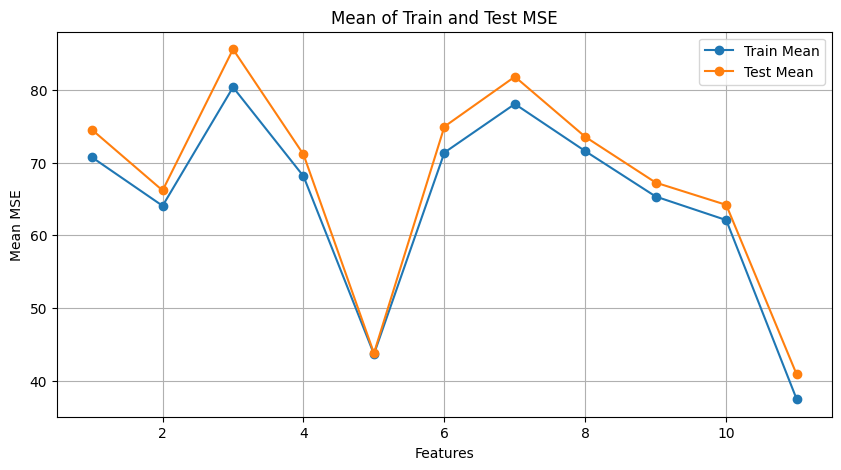

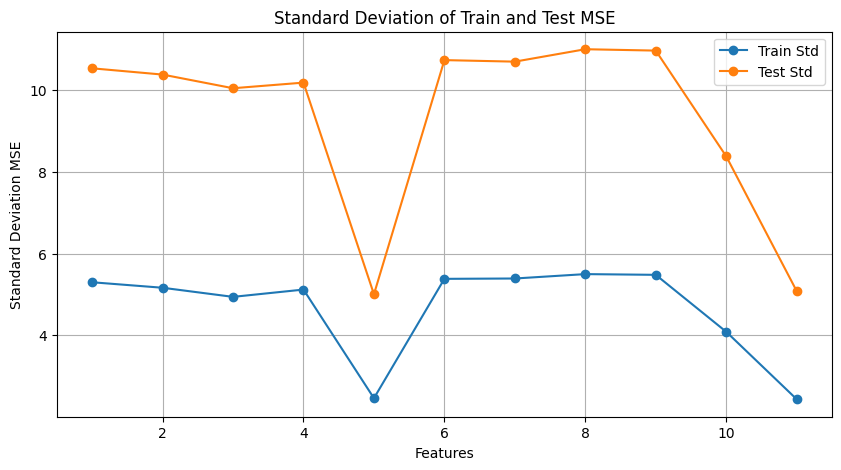

In [313]:
features = range(1, len(mean_train) + 1)


plt.figure(figsize=(10, 5))
plt.plot(features, mean_train, label='Train Mean', marker='o')
plt.plot(features, mean_test, label='Test Mean', marker='o')
plt.title('Mean of Train and Test MSE')
plt.xlabel('Features')
plt.ylabel('Mean MSE')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(features, std_train, label='Train Std', marker='o')
plt.plot(features, std_test, label='Test Std', marker='o')
plt.title('Standard Deviation of Train and Test MSE')
plt.xlabel('Features')
plt.ylabel('Standard Deviation MSE')
plt.legend()
plt.grid()
plt.show()